## Missed Trash Pickups

In this data question you will be working data of service request related to missed trash pickups from hubNashville, Metro Nashville government's comprehensive customer service system (https://hub.nashville.gov).

As part of Metro's contract with Red River Waste Solutions, failure to remedy an action or inaction will result in liquidated damages. One category of liquidated damages is related to chronic problems in any category of service at the same premises. A chronic problem is defined as more than one missed pickup for any address. The first missed pickup will not result in a fine; however, every subsequent missed pickup will result in a $200 fine.

Your job is to determine the total amount of damages due to missed pickups. Note that not all rows that you have been provided correspond to missed pickups and that you will need to ensure that you are only counting missed pickups.
**$1,175,200**

After determining the total amount of damages, you can look at other questions:

* What other types of complaints are there?
* Make a heat map that shows the most total missed pick ups and another that shows the total fines, each by zip code.
* How do metro crews compare to the contractor's performance?
* How much does each trash hauler owe?
* What were to total missed pickup by route?

Before you begin, explore the data.  Cleaning and preparing the data for analysis is an important and necessary step.  
Planning and communication are vital to success. This data and analysis are based on a real-world project.

# KYLE JAQUES WORK: 

In [59]:
!pip install wordcloud

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re


In [61]:
trash = pd.read_csv('./trash_hauler_report.csv')
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [62]:
trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [63]:
#Casting column data types and standarizing Trash Hauler column

In [64]:
trash['Date Opened'] = pd.to_datetime(trash['Date Opened'], format = 'mixed')

In [65]:
trash['Zip Code'] = trash['Zip Code'].astype('Int64').astype('category')

In [66]:
trash['Council District'] = trash['Council District'].astype('Int64').astype('category')

In [67]:
trash['Trash Route'] = trash['Trash Route'].astype('category')

In [68]:
trash['Trash Hauler'] = trash['Trash Hauler'].str.upper()

In [69]:
trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Request Number    20226 non-null  int64         
 1   Date Opened       20226 non-null  datetime64[ns]
 2   Request           20226 non-null  object        
 3   Description       20195 non-null  object        
 4   Incident Address  20217 non-null  object        
 5   Zip Code          20151 non-null  category      
 6   Trash Hauler      19325 non-null  object        
 7   Trash Route       19279 non-null  category      
 8   Council District  20177 non-null  category      
 9   State Plan X      20198 non-null  float64       
 10  State Plan Y      20198 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [70]:
trash['Council District'].unique()

[2, 1, 20, 16, 34, ..., 11, 12, 9, 35, 10]
Length: 36
Categories (35, Int64): [1, 2, 3, 4, ..., 32, 33, 34, 35]

In [71]:
trash.value_counts('Request ')

Request 
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [72]:
#Fixing column name
trash = trash.rename(columns = {'Request ':'Request'})

In [73]:
trash['Request'].unique()

array(['Trash - Backdoor', 'Trash - Curbside/Alley Missed Pickup',
       'Trash Collection Complaint', 'Damage to Property'], dtype=object)

In [115]:
#Filtering for rows where "miss" is found in the Request or Description columns
potential_miss = r'.*[Mm][Ii][Ss]+.*'

In [116]:
# #Filtering for rows where "miss" is found in the Request or Description columns
# potential_miss = r'.[Mm][Ii][Ss]+.'

In [117]:
missed = trash.loc[trash['Description'].str.contains(potential_miss, na=False) | trash['Request'].str.contains(potential_miss, na=False)]

In [118]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [119]:
missed.loc[missed['Incident Address'].isna()]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
625,33128,2017-12-13,Trash - Curbside/Alley Missed Pickup,Missed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,35857,2017-12-29,Trash - Curbside/Alley Missed Pickup,daughters car parked in front,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,39689,2018-01-17,Trash - Curbside/Alley Missed Pickup,Trash pick up not done for Tuesday 1/16/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,41604,2018-01-24,Trash - Curbside/Alley Missed Pickup,cart still out,NaN,37218,RED RIVER,3203,1,1.715186e+06,682289.961678
1851,48203,2018-02-22,Trash - Backdoor,missed for 3 weeks 698 harding pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2794,58920,2018-04-06,Trash - Curbside/Alley Missed Pickup,missed- trash,NaN,37206,METRO,9503,5,1.747402e+06,674741.056063
2839,59517,2018-04-10,Trash - Curbside/Alley Missed Pickup,Trash was not pick up last week.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,62051,2018-04-22,Trash - Curbside/Alley Missed Pickup,They forgot to pick up trash from apartment co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11049,157096,2019-03-20,Trash - Curbside/Alley Missed Pickup,Trash has not been picked up on the whole street.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#Found two missing addresses by using the State Plane coordinates coverted to latitude and longitude. Entered below using the index and column name.

In [121]:
missed.loc[1346, 'Incident Address'] = '4032 Stewarts Ln'

In [122]:
missed.loc[2794, 'Incident Address'] = '1040 Chicamauga Ave'

In [123]:
missed.loc[missed['Incident Address'].isna()]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
625,33128,2017-12-13,Trash - Curbside/Alley Missed Pickup,Missed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,35857,2017-12-29,Trash - Curbside/Alley Missed Pickup,daughters car parked in front,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,39689,2018-01-17,Trash - Curbside/Alley Missed Pickup,Trash pick up not done for Tuesday 1/16/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,48203,2018-02-22,Trash - Backdoor,missed for 3 weeks 698 harding pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2839,59517,2018-04-10,Trash - Curbside/Alley Missed Pickup,Trash was not pick up last week.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,62051,2018-04-22,Trash - Curbside/Alley Missed Pickup,They forgot to pick up trash from apartment co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11049,157096,2019-03-20,Trash - Curbside/Alley Missed Pickup,Trash has not been picked up on the whole street.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
#Dropping records with null address which aren't useful to answer the first question

In [125]:
missed = missed.dropna(subset=['Incident Address'])

In [126]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [127]:
#Splitting the addresses to get the street address portion

In [128]:
missed['Incident Address'] = missed['Incident Address'].str.split(',').str[0]

C:\Users\craft\AppData\Local\Temp\ipykernel_58928\3195929049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed['Incident Address'] = missed['Incident Address'].str.split(',').str[0]


In [129]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,1621 Long Ave,37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,2943 Windemere Cir,37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,3325 Murfreesboro Pike,37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [130]:
#Standardizing address capitalization

In [131]:
missed['Incident Address'] = missed['Incident Address'].str.title()

C:\Users\craft\AppData\Local\Temp\ipykernel_58928\1288744097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed['Incident Address'] = missed['Incident Address'].str.title()


In [132]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 Old Matthews Rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,1621 Long Ave,37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,2943 Windemere Cir,37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,3325 Murfreesboro Pike,37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [133]:
#Save cleaned data to csv
missed.to_csv("missed_clean.csv", index=False)

In [134]:
#Getting 'missed' request counts per address

In [135]:
missed_fines = missed['Incident Address'].value_counts().to_frame()

In [136]:
missed_fines = missed_fines.reset_index()

In [137]:
missed_fines

,Incident Address,count
0,110 George L Davis Blvd,28
1,5135 Hickory Hollow Pkwy,23
2,12546 Old Hickory Blvd,21
3,6007 Obrien Ave,20
4,3710 N Natchez Ct,20
...,...,...
11198,809 Winthorne Ct,1
11199,316 Huntington Ridge Dr,1
11200,1206 Grandview Dr,1
11201,845 Old Hickory Blvd,1


In [138]:
#Renaming count column

In [139]:
missed_fines = missed_fines.rename(columns = {'count':'Missed Count'})

In [140]:
missed_fines

,Incident Address,Missed Count
0,110 George L Davis Blvd,28
1,5135 Hickory Hollow Pkwy,23
2,12546 Old Hickory Blvd,21
3,6007 Obrien Ave,20
4,3710 N Natchez Ct,20
...,...,...
11198,809 Winthorne Ct,1
11199,316 Huntington Ridge Dr,1
11200,1206 Grandview Dr,1
11201,845 Old Hickory Blvd,1


In [141]:
#Doing the math to determine fines per address

In [142]:
missed_fines['Fines'] = (missed_fines['Missed Count'] - 1) * 200

In [143]:
missed_fines

,Incident Address,Missed Count,Fines
0,110 George L Davis Blvd,28,5400
1,5135 Hickory Hollow Pkwy,23,4400
2,12546 Old Hickory Blvd,21,4000
3,6007 Obrien Ave,20,3800
4,3710 N Natchez Ct,20,3800
...,...,...,...
11198,809 Winthorne Ct,1,0
11199,316 Huntington Ridge Dr,1,0
11200,1206 Grandview Dr,1,0
11201,845 Old Hickory Blvd,1,0


In [144]:
#Finding total fines due

In [145]:
total_fines = missed_fines['Fines'].sum()

In [146]:
total_fines

np.int64(1307800)

In [147]:
missed_lean = missed.drop(columns = ['Request Number', 'Date Opened', 'Request', 'Description'], axis=1)
missed_lean

,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,2603 Old Matthews Rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,604 Croley Dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
7,1816 Jo Johnston Ave,37203,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...
20221,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,1621 Long Ave,37206,METRO,9508,6,1.749711e+06,669201.601569
20223,2943 Windemere Cir,37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,3325 Murfreesboro Pike,37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [148]:
#Join dataframes
fines = pd.merge(missed_fines, missed_lean, on='Incident Address', how='left')
fines

,Incident Address,Missed Count,Fines,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735556e+06,664657.700582
1,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735554e+06,664658.933250
2,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735554e+06,664658.933250
3,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735556e+06,664657.700582
4,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735554e+06,664658.933250
...,...,...,...,...,...,...,...,...,...
17737,809 Winthorne Ct,1,0,37217,RED RIVER,1402,16,1.759044e+06,651549.019214
17738,316 Huntington Ridge Dr,1,0,37211,RED RIVER,3402S,27,1.753522e+06,625468.640855
17739,1206 Grandview Dr,1,0,37215,RED RIVER,4305,25,1.733882e+06,647164.837203
17740,845 Old Hickory Blvd,1,0,37115,RED RIVER,3212,8,1.748845e+06,704579.998138


In [149]:
fines = fines.drop_duplicates('Incident Address')

In [150]:
fines.reset_index()

,index,Incident Address,Missed Count,Fines,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,0,110 George L Davis Blvd,28,5400,37203,METRO,9407,19,1.735556e+06,664657.700582
1,28,5135 Hickory Hollow Pkwy,23,4400,37013,RED RIVER,4504,32,1.771715e+06,625525.306114
2,51,12546 Old Hickory Blvd,21,4000,37013,RED RIVER,4510,33,1.789760e+06,620429.691640
3,72,6007 Obrien Ave,20,3800,37209,RED RIVER,4201,20,1.712811e+06,662291.012044
4,92,3710 N Natchez Ct,20,3800,37211,RED RIVER,4302,16,1.751378e+06,641918.401927
...,...,...,...,...,...,...,...,...,...,...
11198,17737,809 Winthorne Ct,1,0,37217,RED RIVER,1402,16,1.759044e+06,651549.019214
11199,17738,316 Huntington Ridge Dr,1,0,37211,RED RIVER,3402S,27,1.753522e+06,625468.640855
11200,17739,1206 Grandview Dr,1,0,37215,RED RIVER,4305,25,1.733882e+06,647164.837203
11201,17740,845 Old Hickory Blvd,1,0,37115,RED RIVER,3212,8,1.748845e+06,704579.998138


In [151]:
#Save merged data to csv
fines.to_csv("fines.csv", index=False)

# What other complaints are there?

In [152]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1.727970e+06,686779.478089
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [153]:
inconsistent_rows = trash['Description'].str.contains(potential_miss, na = False) | trash['Request'].str.contains(potential_miss, na = False)
inconsistent_data = trash[inconsistent_rows]
other_complaints = trash[~inconsistent_rows]
other_complaints

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1.727970e+06,686779.478089
5,25317,2017-11-01,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211,RED RIVER,4304,16,1.751660e+06,643215.201073
6,25325,2017-11-01,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215,RED RIVER,3303,34,1.726301e+06,637078.402245
13,25366,2017-11-01,Trash Collection Complaint,trash truck took cart \r\n3 guys on truck did ...,2200 osage st,37208,METRO,9201,21,1.728645e+06,672074.099110
16,25393,2017-11-01,Trash Collection Complaint,trash carts all tossed in road after pick up,2720 riverbend dr,37214,RED RIVER,1501,15,1.762456e+06,693225.665703
...,...,...,...,...,...,...,...,...,...,...,...
20197,266844,2019-11-01,Trash Collection Complaint,RESIDENT CAME HOME YESTERDAY TO FIND THAT THE ...,"2812 Vaulx Ln, Nashville, Tennessee, 37204",37204,METRO,9404,17,1.738158e+06,652143.579159
20200,266891,2019-11-01,Trash Collection Complaint,"garbage truck is cutting the corner too close,...","1997 Nashboro Blvd, Nashville, Tennessee, 37217",37217,RED RIVER,2505,29,1.781292e+06,639805.438009
20211,267014,2019-11-01,Trash Collection Complaint,MANAGER SAYS HE WITNESSED THE TRASH TRUCK COME...,"109 2nd Ave N, Nashville, TN 37201, United States",37201,NaN,NaN,19,1.739543e+06,666600.801041
20215,267069,2019-11-01,Trash Collection Complaint,trash truck broke a limb out of her tree and l...,"105 Lake Side Ct, Nashville, Tennessee, 37217",37217,RED RIVER,3501,29,1.789265e+06,640868.001440


In [154]:
other_complaints = other_complaints.reset_index(drop=True)
other_complaints

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1.727970e+06,686779.478089
1,25317,2017-11-01,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211,RED RIVER,4304,16,1.751660e+06,643215.201073
2,25325,2017-11-01,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215,RED RIVER,3303,34,1.726301e+06,637078.402245
3,25366,2017-11-01,Trash Collection Complaint,trash truck took cart \r\n3 guys on truck did ...,2200 osage st,37208,METRO,9201,21,1.728645e+06,672074.099110
4,25393,2017-11-01,Trash Collection Complaint,trash carts all tossed in road after pick up,2720 riverbend dr,37214,RED RIVER,1501,15,1.762456e+06,693225.665703
...,...,...,...,...,...,...,...,...,...,...,...
2472,266844,2019-11-01,Trash Collection Complaint,RESIDENT CAME HOME YESTERDAY TO FIND THAT THE ...,"2812 Vaulx Ln, Nashville, Tennessee, 37204",37204,METRO,9404,17,1.738158e+06,652143.579159
2473,266891,2019-11-01,Trash Collection Complaint,"garbage truck is cutting the corner too close,...","1997 Nashboro Blvd, Nashville, Tennessee, 37217",37217,RED RIVER,2505,29,1.781292e+06,639805.438009
2474,267014,2019-11-01,Trash Collection Complaint,MANAGER SAYS HE WITNESSED THE TRASH TRUCK COME...,"109 2nd Ave N, Nashville, TN 37201, United States",37201,NaN,NaN,19,1.739543e+06,666600.801041
2475,267069,2019-11-01,Trash Collection Complaint,trash truck broke a limb out of her tree and l...,"105 Lake Side Ct, Nashville, Tennessee, 37217",37217,RED RIVER,3501,29,1.789265e+06,640868.001440


In [155]:
# convert to csv
other_complaints.to_csv("other_complaints.csv", index=False)

In [176]:
# lays foundation for the wordcloud
stopwords = STOPWORDS

wc = WordCloud(
    background_color="white",
    stopwords=stopwords,
    colormap="BrBG"
).generate(" ".join(wordcloud['Description'].dropna().astype(str)))

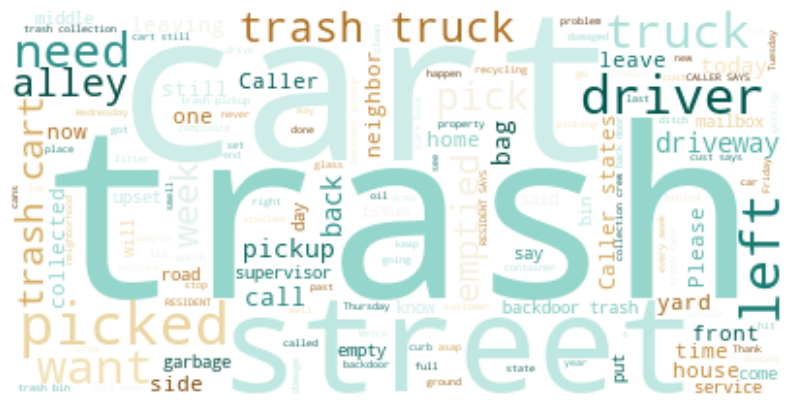

In [179]:
# generates the wordcloud visualization
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [181]:
# convert wordcloud to csv
wc.to_file("wordcloud.png")